# Lab Segmentation 2


In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2


C:\Users\Hossam Saeed\AppData\Local\Temp/ipykernel_11088/1720291585.py:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img=rgb2gray(img)


(240, 320)


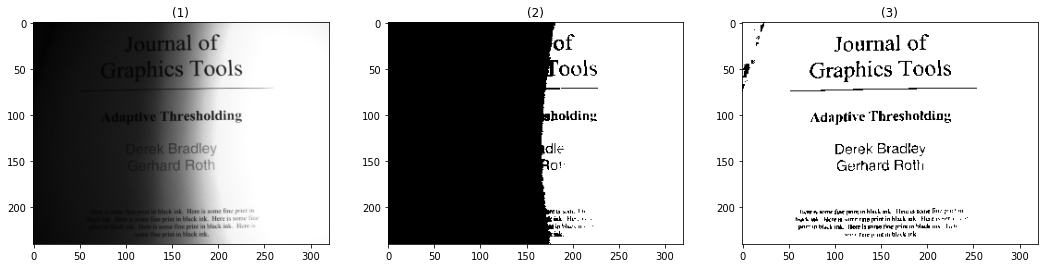

In [72]:
def getThreshold(img):
    # 1
    # img *= 255
    img=rgb2gray(img)
    if np.max(img) <= 1:
        img=img*255
    img=img.astype('uint8')
    # 2
    H = histogram(img, list(range(0, 256)), 'dtype')[0]

    # 3
    sum_gray_levels = sum(grayLevel * value for grayLevel,
                          value in enumerate(H))
    sum_pixels = np.cumsum(H)[-1]
    T_init = round(sum_gray_levels/sum_pixels)

    T_old = T_init
    T_new = -100

    while(abs(T_old - T_new) > 0.001):
        if T_new == -100:
            T_new = T_old
        else:
            T_old = T_new
        # 4
        average_lower = 0.5
        count_lower = 0.5
        for grayLevel in range(0, int(T_old)):
            average_lower += grayLevel * H[grayLevel]
            count_lower+=H[grayLevel]
        average_lower =round(average_lower / count_lower)
        

        average_higher = 0.5
        count_higher = 0.5
        for grayLevel in range(int(T_old), len(H)):
            average_higher += grayLevel * H[grayLevel]
            count_higher+=H[grayLevel]
        
        average_higher =round(average_higher / count_higher)

        # 5
        T_new = (average_lower + average_higher)/2
        # print(f'T_old = {T_old}')
        # print(f'T_high = {T_new}')

    newImg = img.copy()
    mask0 = newImg <= T_new
    mask1 = newImg > T_new
    newImg[mask0] = 0
    newImg[mask1] = 1
    return newImg

oldImg = io.imread("./book1.png")
globalImg = getThreshold(oldImg)

def recursiveThreshold(oldImg, minS):
    height, width = oldImg.shape[0:2]

    img00 = oldImg[0:height//2,0:width//2]
    img01 = oldImg[0:height//2,width//2:width]
    img10 = oldImg[height//2:height,0:width//2]
    img11 = oldImg[height//2:height,width//2:width]

    if height < minS or width < minS:
        img00 = getThreshold(img00)
        img01 = getThreshold(img01) 
        img10 = getThreshold(img10)
        img11 = getThreshold(img11)
    else:
        img00 = recursiveThreshold(img00, minS)
        img01 = recursiveThreshold(img01, minS)
        img10 = recursiveThreshold(img10, minS)
        img11 = recursiveThreshold(img11, minS)

    localImg = np.concatenate((np.concatenate((img00,img10)),np.concatenate((img01,img11))),axis=1)
    return localImg

height, width = oldImg.shape[0:2]
localImg = recursiveThreshold(oldImg, height/50)

print(localImg.shape)

show_images([oldImg,globalImg,localImg])
